In [1]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten 28x28 images → 784 features and normalize
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test  = X_test.reshape(-1, 28*28) / 255.0

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (60000, 784) (60000,)
Test shape: (10000, 784) (10000,)


1. Decision Tree Classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dt = DecisionTreeClassifier(random_state=60)
dt.fit(X_train, y_train)


y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)


Decision Tree Accuracy: 0.8784


The Decision Tree classifier was implemented and trained on the full MNIST dataset (60,000 training and 10,000 testing samples). Its performance was evaluated using the accuracy metric, achieving an accuracy of 87.84%. This result highlights that decision trees are relatively effective but prone to overfitting. The model learned rules based on pixel intensity splits (e.g., whether a pixel is dark or light) to separate digits.

2. Naive Bayes Implementation

In [4]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score

# Gaussian Naive Bayes
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print("Gaussian NB Accuracy:", acc_gnb)


Gaussian NB Accuracy: 0.5558


In [5]:
# Multinomial Naive Bayes
mnb = MultinomialNB()
y_pred_mnb = mnb.fit(X_train, y_train).predict(X_test)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
print("Multinomial NB Accuracy:", acc_mnb)

Multinomial NB Accuracy: 0.8357


Two Naive Bayes classifiers (Gaussian and Multinomial) were implemented and trained. Their performance was evaluated using the accuracy metric. The Gaussian NB classifier achieved an accuracy of 55.58%, while the Multinomial NB classifier achieved 83.57%. This demonstrates that the Multinomial variant is much more suitable for MNIST, as pixel intensities resemble count like features. In contrast, Gaussian NB assumes normally distributed continuous features, which does not align well with image pixel data, leading to lower performance.

3. Support Vector Machine (SVM)

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear SVM
svm_linear = SVC(kernel="linear", random_state=60)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_svm_linear = accuracy_score(y_test, y_pred_linear)
print("SVM Linear Accuracy:", acc_svm_linear)

SVM Linear Accuracy: 0.9404


In [7]:
# RBF SVM
svm_rbf = SVC(kernel="rbf", random_state=60)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_svm_rbf = accuracy_score(y_test, y_pred_rbf)
print("SVM RBF Accuracy:", acc_svm_rbf)

SVM RBF Accuracy: 0.9792


A Support Vector Machine (SVM) classifier was implemented and trained on the full MNIST dataset (60,000 training and 10,000 testing samples). Two kernel functions were tested: linear and RBF.
The linear SVM achieved an accuracy of 94.04%, while the RBF SVM achieved 97.92%. These results are consistent with theoretical expectations: the RBF kernel, by capturing nonlinear decision boundaries, outperformed the linear kernel. The relatively strong performance of the linear kernel can be attributed to the large training set, which enabled the model to generalize well despite its linear decision boundary. However, the RBF kernel required significantly more computation time, illustrating the trade-off between higher accuracy and computational cost.

4. k-Nearest Neighbors (k-NN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

results_knn = {}

for k in [1, 3, 5, 7, 9 , 11]:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    results_knn[k] = acc_knn
    print(f"k = {k}, Accuracy = {acc_knn:.4f}")


k = 1, Accuracy = 0.9691
k = 3, Accuracy = 0.9705
k = 5, Accuracy = 0.9688
k = 7, Accuracy = 0.9694
k = 9, Accuracy = 0.9659
k = 11, Accuracy = 0.9668


The performance was evaluated using the accuracy metric for different values of k:
k = 1 - 96.91%
k = 3 - 97.05%
k = 5 - 96.88%
k = 7 - 96.94%
k = 9 - 96.59%
k = 11 - 96.88%
The optimal value of k was found to be 3, which provided the highest accuracy. Smaller k values (like k=1) tended to overfit, while larger k values smoothed the predictions and slightly reduced accuracy.

5. Ensemble Methods

In [9]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Bagging
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=60,
    n_jobs=-1
)
bagging.fit(X_train, y_train)
acc_bagging = accuracy_score(y_test, bagging.predict(X_test))
print("Bagging Accuracy:", acc_bagging)



Bagging Accuracy: 0.9583


In [10]:
# Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=60,
    n_jobs=-1
)
rf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf.predict(X_test))
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.9699


In [11]:

# AdaBoost
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=10),
    n_estimators=100,
    random_state=60
)
ada.fit(X_train, y_train)
acc_ada = accuracy_score(y_test, ada.predict(X_test))
print("AdaBoost Accuracy:", acc_ada)

AdaBoost Accuracy: 0.9673


In [12]:
# XGBoost
xg = xgb.XGBClassifier(
    n_estimators=250,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=60,
    n_jobs=-1
)
xg.fit(X_train, y_train)
acc_xg = accuracy_score(y_test, xg.predict(X_test))
print("XGBoost Accuracy:", acc_xg)

XGBoost Accuracy: 0.9786


All of them outperformed a single Decision Tree's 87.84% accuracy.

XGBoost came out on top with a 97.86% score, followed by Random Forest at 96.99% and AdaBoost at 96.73%, with Bagging at 95.83%. Each method's success comes down to its strategy, Bagging works by combining many trees to reduce errors, while Random Forest improves on this by adding feature randomness. On the other hand, AdaBoost's approach of sequentially correcting mistakes proved highly effective, but it was the optimized and regularized boosting in XGBoost that delivered the best result. The main trade-off we noticed was training time, as some methods like AdaBoost took significantly longer to run than the much faster Bagging and Random Forest models.


Performance Summary Table:
            Model  Accuracy
0         SVM RBF    0.9792
1         XGBoost    0.9786
2      k-NN (k=3)    0.9705
3   Random Forest    0.9699
4        AdaBoost    0.9673
5         Bagging    0.9583
6      SVM Linear    0.9404
7   Decision Tree    0.8784
8  Multinomial NB    0.8357
9     Gaussian NB    0.5558


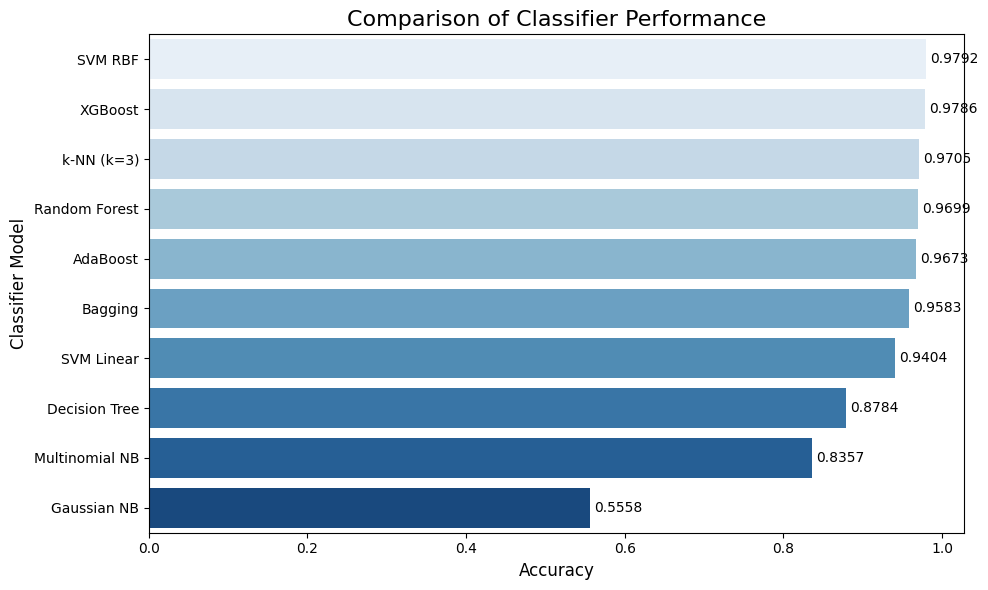

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


results = {
    "Decision Tree": 0.8784,
    "Gaussian NB": 0.5558,
    "Multinomial NB": 0.8357,
    "SVM Linear": 0.9404,
    "SVM RBF": 0.9792,
    "k-NN (k=3)": 0.9705,
    "Bagging": 0.9583,
    "Random Forest": 0.9699,
    "AdaBoost": 0.9673,
    "XGBoost": 0.9786
}

print("\nPerformance Summary Table:")

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_df)

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x='Accuracy',
    y='Model',
    data=results_df,
    palette='Blues',
    hue='Model',
    legend=False,
    dodge=False
)

plt.title('Comparison of Classifier Performance', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Classifier Model', fontsize=12)


for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', fontsize=10, padding=3)

plt.tight_layout()

plt.show()